In [143]:
import numpy as np
import pandas as pd
from glob import glob
from decimal import Decimal
from os.path import join
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [96]:
test_user_RDI = {
   'Vitamin_B12': Decimal('2.4'),
   'Calcium': Decimal('800'),
   'Iron': Decimal('10'),
   'Leucine': Decimal('3100'),
   'Histidine': Decimal('1000'),
   'Phenylalanine+Tyrosine': Decimal('3600'),
   'Carbohydrate': Decimal('248'),
   'Magnesium': Decimal('360'),
   'Selenium': Decimal('60'),
   'Copper': Decimal('850'),
   'Alpha_Linolenic_Acid': Decimal('1.6'),
   'Threonine': Decimal('1500'),
   'Linoleic_Acid': Decimal('13'),
   'Methionine': Decimal('1400'),
   'Phosphorus': Decimal('700'),
   'Niacin': Decimal('16'),
   'Zinc': Decimal('10'),
   'Calories': Decimal('1655'),
   'Protein': Decimal('70'),
   'Sodium': Decimal('1500'),
   'Vitamin_D': Decimal('10'),
   'Vitamin_C': Decimal('100'),
   'Lysine': Decimal('3100'),
   'Valine': Decimal('1700'),
   'Vitamin_A': Decimal('800'),
   'Fat': Decimal('42'),
   'Folic_acid': Decimal('400'),
   'Dietary_Fiber': Decimal('30'),
   'Vitamin_E': Decimal('12'),
   'Vitamin_B6': Decimal('1.5'),
   'Potassium': Decimal('3500'),
   'Vitamin_K': Decimal('75'),
   'Iso_Leucine': Decimal('1400'),
   'Manganese': Decimal('4')
    }

In [97]:
test_user_intake = {
    'Vitamin_B12': Decimal('3.8'),
    'Calcium': Decimal('277.2'),
    'Iron': Decimal('9.4'),
    'Leucine': Decimal('4352.6'),
    'Histidine': Decimal('1599.2'),
    'Phenylalanine+Tyrosine': Decimal('3694.2'),
    'Carbohydrate': Decimal('169.6'),
    'Magnesium': Decimal('162'),
    'Selenium': Decimal('72.6'),
    'Copper': Decimal('1'),
    'Threonine': Decimal('2486'),
    'Alpha_Linolenic_Acid': Decimal('1'),
    'Methionine': Decimal('830.6'),
    'Linoleic_Acid': Decimal('11.4'),
    'Phosphorus': Decimal('711.8'),
    'Calories': Decimal('1284'),
    'Protein': Decimal('60'),
    'Zinc': Decimal('18.8'),
    'Cholesterol': Decimal('380.4'),
    'Sodium': Decimal('2086.4'),
    'Vitamin_C': Decimal('18.2'),
    'Lysine': Decimal('3878.2'),
    'Valine': Decimal('2809.2'),
    'Vitamin_A': Decimal('7018.8'),
    'Fat': Decimal('38'),
    'Folic_acid': Decimal('365.4'),
    'Dietary_Fiber': Decimal('18'),
    'Potassium': Decimal('1618.2'),
    'Iso_Leucine': Decimal('2320.4'),
    'Manganese': Decimal('3.2')
    }

In [98]:
def recommendation_system(UserRdi, UserIntake, Category):
    BASE_DIR= ''
    data_path= join(BASE_DIR, f'{Category}.csv')
    sr_rdi= pd.Series(UserRdi,
            dtype= float).drop(['Calories', 'Folic_acid', 'Carbohydrate', 'Protein', 'Fat'])
    sr_intake= pd.Series(UserIntake, index= sr_rdi.index, dtype= float)
    sr_diff= sr_rdi- sr_intake
    sr_diff.fillna(0, inplace= True)
    sr_diff_ratio= pd.Series((sr_diff/ sr_rdi), dtype= float, name= 'user_diff')
    sr_diff_ratio.fillna(0, inplace= True)
    std_cols= sr_diff_ratio.index
    data= pd.read_csv(data_path, index_col= 'prod_cd')
    df= pd.DataFrame(data, columns= std_cols, dtype= float).fillna(0)
    df_ratio= (df/ sr_rdi)
    SSE= df_ratio.apply(lambda row: np.sum((row- sr_diff_ratio)**2), axis= 1)

    ratio_top3= SSE.sort_values(ascending= True)[:3]

    df_cosine= df_ratio.append(sr_diff_ratio)
    df_cosine['similarity']= cosine_similarity(df_cosine, df_cosine)[:,-1]
    similarity_top3= df_cosine.sort_values(by= 'similarity', ascending= False)[1:4]

    return sr_diff, sr_diff_ratio, df, df_ratio, ratio_top3, similarity_top3


In [99]:
diff_val, diff_ratio, m_nutri, m_nutri_ratio, m_ratio_top3, m_similarity_top3= \
                    recommendation_system(test_user_RDI, test_user_intake, 'minerals')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_3471/2706372605.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


In [100]:
diff_val, diff_ratio, v_nutri, v_nutri_ratio, v_ratio_top3, v_similarity_top3= \
                    recommendation_system(test_user_RDI, test_user_intake, 'vitamins')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_3471/2706372605.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


In [101]:
diff_val, diff_ratio, a_nutri, a_nutri_ratio, a_ratio_top3, a_similarity_top3= \
                    recommendation_system(test_user_RDI, test_user_intake, 'amino-acids')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_3471/2706372605.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


### 사용자 difference( rdi- intake )

In [102]:
diff_val[diff_val> 0].sort_values(ascending= False)

Potassium               1881.8
Copper                   849.0
Methionine               569.4
Calcium                  522.8
Magnesium                198.0
Vitamin_C                 81.8
Dietary_Fiber             12.0
Linoleic_Acid              1.6
Manganese                  0.8
Alpha_Linolenic_Acid       0.6
Iron                       0.6
dtype: float64

### 사용자 difference 비율 (difference/ rdi)

In [103]:
diff_ratio[diff_ratio> 0].sort_values(ascending= False)

Copper                  0.998824
Vitamin_C               0.818000
Calcium                 0.653500
Magnesium               0.550000
Potassium               0.537657
Methionine              0.406714
Dietary_Fiber           0.400000
Alpha_Linolenic_Acid    0.375000
Manganese               0.200000
Linoleic_Acid           0.123077
Iron                    0.060000
Name: user_diff, dtype: float64

## 미네랄 -> 비타민 -> 아미노산

### 선별 (SSE, Cosine Similarity)

#### 미네랄

In [104]:
m_ratio_top3

prod_cd
CAT-02554    65.661707
AOR-08333    65.961025
RLT-10102    66.065480
dtype: float64

In [174]:
m_nutri_ratio.loc['CAT-02554'][m_nutri_ratio.loc['CAT-02554']> 0].sort_values(ascending= False)

Calcium      0.900000
Vitamin_C    0.900000
Magnesium    0.147222
Sodium       0.006667
Name: CAT-02554, dtype: float64

In [106]:
m_nutri.loc['CAT-02554'][m_nutri.loc['CAT-02554']> 0].sort_values(ascending= False)

Calcium      720.0
Vitamin_C     90.0
Magnesium     53.0
Sodium        10.0
Name: CAT-02554, dtype: float64

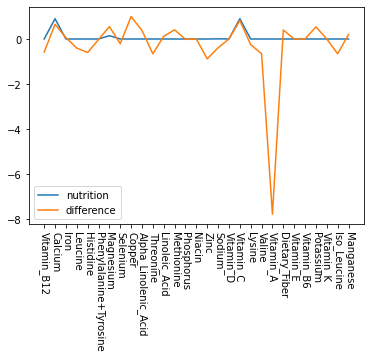

In [197]:
plt.plot(m_nutri_ratio.loc['CAT-02554'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

#### 과잉된 영양소

In [172]:
diff_ratio[diff_ratio< 0].sort_values(ascending= True)

Vitamin_A                -7.773500
Zinc                     -0.880000
Iso_Leucine              -0.657429
Threonine                -0.657333
Valine                   -0.652471
Histidine                -0.599200
Vitamin_B12              -0.583333
Leucine                  -0.404065
Sodium                   -0.390933
Lysine                   -0.251032
Selenium                 -0.210000
Phenylalanine+Tyrosine   -0.026167
Phosphorus               -0.016857
Name: user_diff, dtype: float64

In [107]:
m_nutri_ratio.loc['AOR-08333'][m_nutri_ratio.loc['AOR-08333']> 0].sort_values(ascending= False)

Vitamin_C    1.000000
Magnesium    0.277778
Name: AOR-08333, dtype: float64

In [108]:
m_nutri.loc['AOR-08333'][m_nutri.loc['AOR-08333']> 0].sort_values(ascending= False)

Magnesium    100.0
Vitamin_C    100.0
Name: AOR-08333, dtype: float64

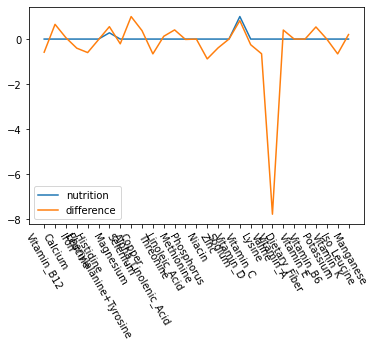

In [194]:
plt.plot(m_nutri_ratio.loc['AOR-08333'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [109]:
m_nutri_ratio.loc['RLT-10102'][m_nutri_ratio.loc['RLT-10102']> 0].sort_values(ascending= False)

Magnesium     0.891667
Vitamin_C     0.670000
Vitamin_B6    0.466667
Vitamin_D     0.330000
Calcium       0.208750
Manganese     0.075000
Name: RLT-10102, dtype: float64

In [110]:
m_nutri.loc['RLT-10102'][m_nutri.loc['RLT-10102']> 0].sort_values(ascending= False)

Magnesium     321.0
Calcium       167.0
Vitamin_C      67.0
Vitamin_D       3.3
Vitamin_B6      0.7
Manganese       0.3
Name: RLT-10102, dtype: float64

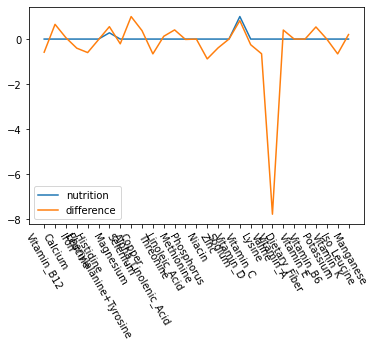

In [193]:
plt.plot(m_nutri_ratio.loc['AOR-08333'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [111]:
m_similarity_top3['similarity']

prod_cd
CAT-02554    0.133921
PTG-00098    0.123637
PTG-04354    0.123637
Name: similarity, dtype: float64

In [112]:
m_nutri_ratio.loc['PTG-00098'][m_nutri_ratio.loc['PTG-00098']> 0].sort_values(ascending= False)

Vitamin_C    2.900000
Magnesium    0.972222
Calcium      0.287500
Vitamin_D    0.200000
Potassium    0.031429
Name: PTG-00098, dtype: float64

In [113]:
m_nutri.loc['PTG-00098'][m_nutri.loc['PTG-00098']> 0].sort_values(ascending= False)

Magnesium    350.0
Vitamin_C    290.0
Calcium      230.0
Potassium    110.0
Vitamin_D      2.0
Name: PTG-00098, dtype: float64

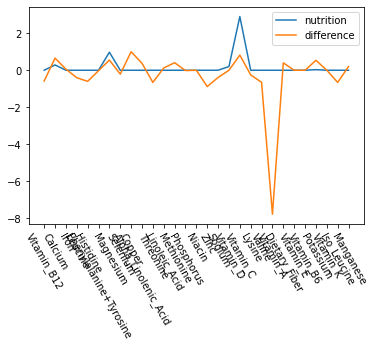

In [192]:
plt.plot(m_nutri_ratio.loc['PTG-00098'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [114]:
m_nutri_ratio.loc['PTG-04354'][m_nutri_ratio.loc['PTG-04354']> 0].sort_values(ascending= False)

Vitamin_C    2.900000
Magnesium    0.972222
Calcium      0.287500
Vitamin_D    0.200000
Potassium    0.031429
Name: PTG-04354, dtype: float64

In [115]:
m_nutri.loc['PTG-04354'][m_nutri.loc['PTG-04354']> 0].sort_values(ascending= False)

Magnesium    350.0
Vitamin_C    290.0
Calcium      230.0
Potassium    110.0
Vitamin_D      2.0
Name: PTG-04354, dtype: float64

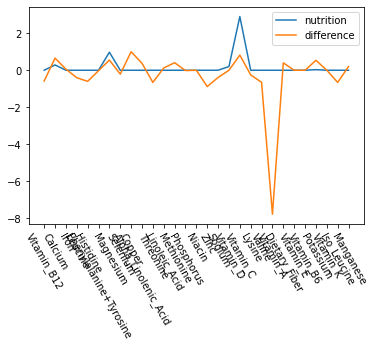

In [181]:
plt.plot(m_nutri_ratio.loc['PTG-04354'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

#### 비타민

In [116]:
v_ratio_top3

prod_cd
SOR-04420    66.039178
SOR-04421    66.039178
MRO-47134    66.163020
dtype: float64

In [117]:
v_nutri_ratio.loc['SOR-04420'][v_nutri_ratio.loc['SOR-04420']> 0].sort_values(ascending= False)

Vitamin_C    0.950000
Magnesium    0.102778
Calcium      0.025000
Name: SOR-04420, dtype: float64

In [118]:
v_nutri.loc['SOR-04420'][v_nutri.loc['SOR-04420']> 0].sort_values(ascending= False)

Vitamin_C    95.0
Magnesium    37.0
Calcium      20.0
Name: SOR-04420, dtype: float64

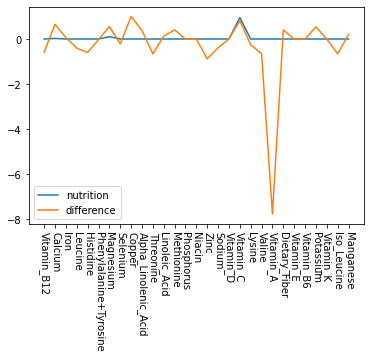

In [198]:
plt.plot(v_nutri_ratio.loc['SOR-04420'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

In [119]:
v_nutri_ratio.loc['SOR-04421'][v_nutri_ratio.loc['SOR-04421']> 0].sort_values(ascending= False)

Vitamin_C    0.950000
Magnesium    0.102778
Calcium      0.025000
Name: SOR-04421, dtype: float64

In [120]:
v_nutri.loc['SOR-04421'][v_nutri.loc['SOR-04421']> 0].sort_values(ascending= False)

Vitamin_C    95.0
Magnesium    37.0
Calcium      20.0
Name: SOR-04421, dtype: float64

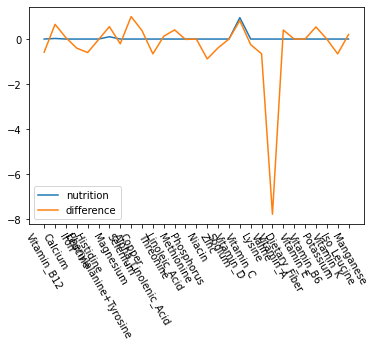

In [183]:
plt.plot(v_nutri_ratio.loc['SOR-04421'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [121]:
v_nutri_ratio.loc['MRO-47134'][v_nutri_ratio.loc['MRO-47134']> 0].sort_values(ascending= False)

Vitamin_C    0.9
Name: MRO-47134, dtype: float64

In [122]:
v_nutri.loc['MRO-47134'][v_nutri.loc['MRO-47134']> 0].sort_values(ascending= False)

Vitamin_C    90.0
Name: MRO-47134, dtype: float64

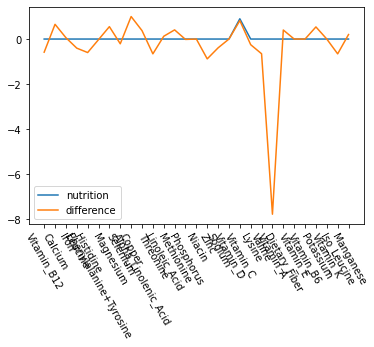

In [184]:
plt.plot(v_nutri_ratio.loc['MRO-47134'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [123]:
v_similarity_top3['similarity']

prod_cd
SOR-84663    0.109208
SOR-04421    0.108776
SOR-04420    0.108776
Name: similarity, dtype: float64

In [124]:
v_nutri_ratio.loc['SOR-84663'][v_nutri_ratio.loc['SOR-84663']> 0].sort_values(ascending= False)

Vitamin_C    0.25000
Calcium      0.03125
Name: SOR-84663, dtype: float64

In [125]:
v_nutri.loc['SOR-84663'][v_nutri.loc['SOR-84663']> 0].sort_values(ascending= False)

Calcium      25.0
Vitamin_C    25.0
Name: SOR-84663, dtype: float64

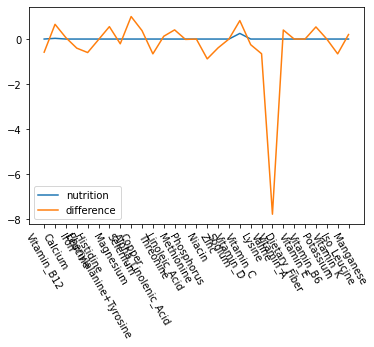

In [185]:
plt.plot(v_nutri_ratio.loc['SOR-84663'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

#### 아미노산

In [126]:
a_ratio_top3

prod_cd
SNS-00190    66.659486
MBM-00140    66.662461
ARG-50610    66.662461
dtype: float64

In [127]:
a_nutri_ratio.loc['SNS-00190'][a_nutri_ratio.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   0.142500
Phenylalanine+Tyrosine    0.000139
Name: SNS-00190, dtype: float64

In [128]:
a_nutri.loc['SNS-00190'][a_nutri.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   114.0
Phenylalanine+Tyrosine      0.5
Name: SNS-00190, dtype: float64

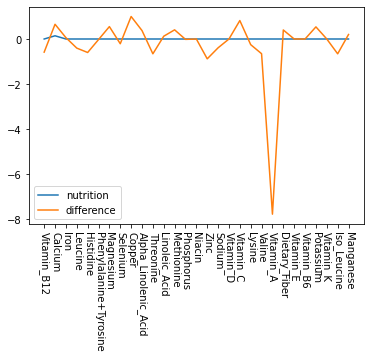

In [196]:
plt.plot(a_nutri_ratio.loc['SNS-00190'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

In [140]:
a_nutri_ratio.loc['MBM-00140'][a_nutri_ratio.loc['MBM-00140']> 0].sort_values(ascending= False)

Methionine    0.357143
Name: MBM-00140, dtype: float64

In [141]:
a_nutri.loc['MBM-00140'][a_nutri.loc['MBM-00140']> 0].sort_values(ascending= False)

Methionine    500.0
Name: MBM-00140, dtype: float64

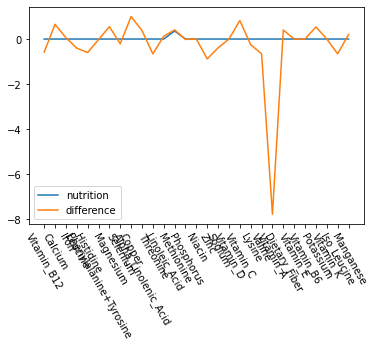

In [187]:
plt.plot(a_nutri_ratio.loc['MBM-00140'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [131]:
a_nutri_ratio.loc['ARG-50610'][a_nutri_ratio.loc['ARG-50610']> 0].sort_values(ascending= False)

Methionine    0.357143
Name: ARG-50610, dtype: float64

In [132]:
a_nutri.loc['ARG-50610'][a_nutri.loc['ARG-50610']> 0].sort_values(ascending= False)

Methionine    500.0
Name: ARG-50610, dtype: float64

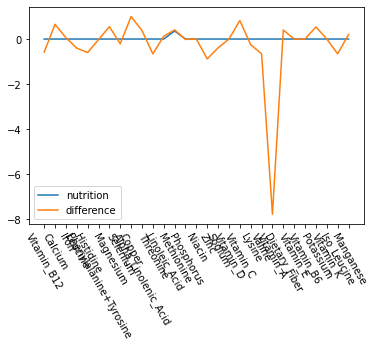

In [188]:
plt.plot(a_nutri_ratio.loc['ARG-50610'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [133]:
a_similarity_top3['similarity']

prod_cd
SNS-00758    0.100582
SNS-00190    0.079939
SNS-00163    0.079936
Name: similarity, dtype: float64

In [134]:
a_nutri_ratio.loc['SNS-00758'][a_nutri_ratio.loc['SNS-00758']> 0].sort_values(ascending= False)

Vitamin_C        10.000000
Lysine            0.354839
Magnesium         0.127778
Calcium           0.082500
Dietary_Fiber     0.033333
Name: SNS-00758, dtype: float64

In [135]:
a_nutri.loc['SNS-00758'][a_nutri.loc['SNS-00758']> 0].sort_values(ascending= False)

Lysine           1100.0
Vitamin_C        1000.0
Calcium            66.0
Magnesium          46.0
Dietary_Fiber       1.0
Name: SNS-00758, dtype: float64

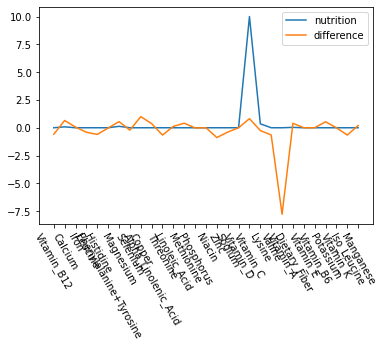

In [189]:
plt.plot(a_nutri_ratio.loc['SNS-00758'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [136]:
a_nutri_ratio.loc['SNS-00190'][a_nutri_ratio.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   0.142500
Phenylalanine+Tyrosine    0.000139
Name: SNS-00190, dtype: float64

In [137]:
a_nutri.loc['SNS-00190'][a_nutri.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   114.0
Phenylalanine+Tyrosine      0.5
Name: SNS-00190, dtype: float64

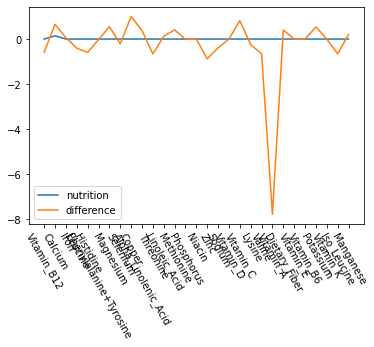

In [190]:
plt.plot(a_nutri_ratio.loc['SNS-00190'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()

In [138]:
a_nutri_ratio.loc['SNS-00163'][a_nutri_ratio.loc['SNS-00163']> 0].sort_values(ascending= False)

Calcium                   0.108750
Phenylalanine+Tyrosine    0.000208
Name: SNS-00163, dtype: float64

In [139]:
a_nutri.loc['SNS-00163'][a_nutri.loc['SNS-00163']> 0].sort_values(ascending= False)

Calcium                   87.00
Phenylalanine+Tyrosine     0.75
Name: SNS-00163, dtype: float64

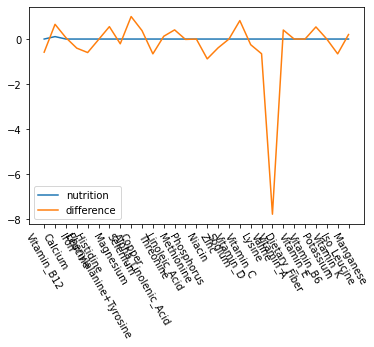

In [191]:
plt.plot(a_nutri_ratio.loc['SNS-00163'])
plt.plot(diff_ratio)
plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-60)
plt.show()